# Integración (Método Monte Carlo)

_¿Cuál es el valor de la siguiente integral?:_
$$\int_{0}^{\pi} e^{-\frac{x^2}{2}}\, dx$$

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creamos la función
f = lambda x: np.exp(-(x**2)/2)
# Mostramos su dominio de integración
df = pd.DataFrame({r'$x$':np.linspace(-0.5,4,1000)})
# Aplicamos la función
df[r'$f(x)$'] = df[r'$x$'].apply(f)

In [3]:
# Mostrar el Data Frame
df.head(10)

,$x$,$f(x)$
0,-0.500000,0.882497
1,-0.495495,0.884478
2,-0.490991,0.886445
3,-0.486486,0.888399
4,-0.481982,0.890339
5,-0.477477,0.892265
6,-0.472973,0.894177
7,-0.468468,0.896075
8,-0.463964,0.897959
9,-0.459459,0.899828


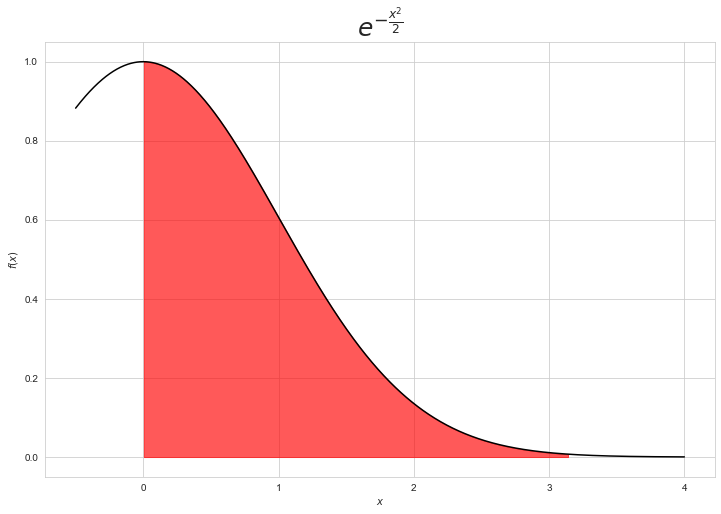

In [4]:
# Acotemos los parámetros
df_acot = df.loc[(df[r'$x$']<np.pi)&(df[r'$x$']>0)]
# Demos estilo a la gráfica
sns.set_style('whitegrid')
sns.set_palette('tab10')
# Mostremos la gráfica
plt.figure(figsize = (12,8))
ax = sns.lineplot(x = r'$x$', y = r'$f(x)$', data = df, color = 'black')
ax.fill_between(df_acot[r'$x$'],0,df_acot[r'$f(x)$'], alpha = 0.65, color = 'red')
ax.set_title(r'$e^{-\frac{x^2}{2}}$', fontsize = 25)
plt.show()

Como podremos notar, está función no tiene primitiva, sin embargo, podemos aproximar el valor de la integral, en un intervalo definido, por medio del método de __Monte Carlo__.

# Método de Monte Carlo

Recordemos el siguiente resultado:

$\textbf{Teorema del Estadístico Inconsciente: } \text{Dada una variable aleatoria }X\text{, con función de densidad } f(x) \text{, y }$
$g :\mathbb{R}\longrightarrow \mathbb{R} \text{ una función tal que } \mathbb{E}[g(X)]<\infty \text{ entonces:}$

$$\mathbb{E}[g(X)] = \int_{-\infty}^{\infty} g(x)f(x)\, dx$$

Usando el resultado anterior, consideremos $X\thicksim Unif(a,b)$, y una función $g\in \mathcal{C}^0(a,b)$, entonces:

$$\mathbb{E}[g(X)] = \int_{-\infty}^{\infty} g(x)f(x)\, dx = \int_{a}^{b} \frac{g(x)}{b-a}\, dx =\frac{1}{b-a} \int_{a}^{b} g(x)\, dx$$
$$\Rightarrow (b-a)\mathbb{E}[g(X)] = \int_{a}^{b} g(x)\, dx$$

Ahora, recordemos el siguiente teorema:

$\textbf{Ley Fuerte de los Grandes Números: }\text{Dada una sucesión de variables aleatorias i.i.d.} \{X_k\}_{k=1}^{\infty} \text{, donde cada una tiene media finita } \mu:=\mathbb{E}[X]. \text{Entonces: }$
$$\frac{1}{n}\sum_{k=1}^{n}X_k \overset{c.s.}{\longrightarrow}\mu$$

De esta manera, consideramos $\{g(X_k)\}_{k=1}^{\infty}$. Entonces tenemos que:
$$\frac{1}{n}\sum_{k=1}^{n}g(X_k) \overset{c.s.}{\longrightarrow} \mathbb{E}[g(X)]$$

Y con lo ya mencionado, podemos concluir que:

$$\frac{b-a}{n}\sum_{k=1}^{n} g(X_k)\overset{c.s.}{\longrightarrow} \int_{a}^{b} g(x)\, dx$$

Dicho de otra manera:

$$\mathbb{P}\Big(\lim_{n\to\infty}\frac{b-a}{n}\sum_{k=1}^{n} g(X_k)=\int_{a}^{b} g(x)\, dx\Big) =1$$

Ahora podemos aproximar el valor de la integral que mencionamos al inicio por medio del método de Monte Carlo, realizando el siguiente procedimiento:
1. Generar una muestra de una v.a. $Unif(a,b)$ de tamaño $n\in\mathbb{N}$
2. Aplicar la función $f$ a la cual se le desea obtener la integral, obteniendo el conjunto de números $\{f(x_k)\}_{k=1}^{n}$
3. Tomar el promedio de la muestra anterior, es decir:
$$\frac{1}{n} \sum_{k=1}^{n}f(x_k)$$
4. Concluyendo de esta manera que:
$$(b-a)\frac{1}{n} \sum_{k=1}^{n}f(x_k) \approx \int_{a}^{b} f(x)\, dx$$

_(La aproximación es mejor a mayor sea $n$)_

In [5]:
# Definir la función para integrar usando el método de Monte Carlo
def MonteCarloInt(f, a, b, n, plot = False):
    df = pd.DataFrame({'x':np.random.uniform(a,b,n)})
    df['f'] = df['x'].apply(f)
    m = df['f'].mean()
    if plot:
        df_plot = pd.DataFrame({'x': np.linspace( a - (b-a)/10,b+ (b-a)/10,1000)})
        df_plot['f'] = df_plot['x'].apply(f)
        sns.set_style('whitegrid')
        sns.set_palette('tab10')
        plt.figure(figsize = (12,8))
        ax = sns.lineplot(x = 'x', y = 'f', data = df_plot, color = 'black')
        ax.set_title('Integración Monte Carlo ('+str(n)+')', fontsize = 25)
        ax.set_xlabel(r'$x$',fontsize = '15')
        ax.set_ylabel(r'$f(x)$',fontsize = '15')
        plt.plot((df['x'], df['x']), ([0]*n, df['f']),color='#1c93e8', lw=200/n, ls='-', alpha=1)
        
    return (b-a)*m

1.2460414674535787

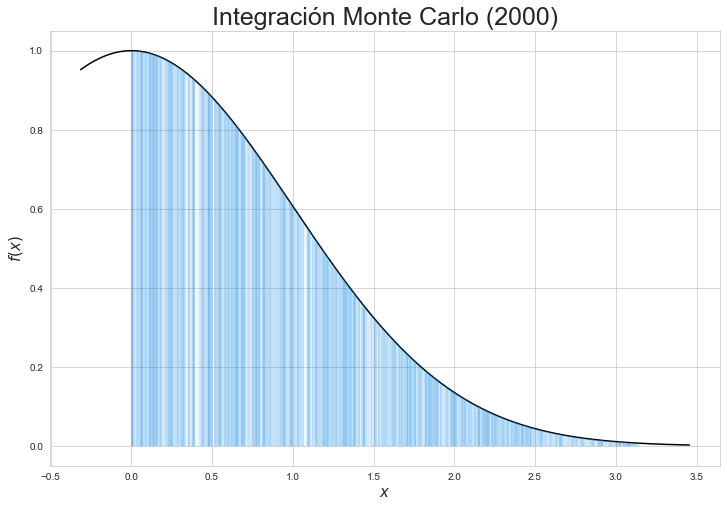

In [6]:
# Consideremos el ejemplo antes mostrado
MonteCarloInt(f,0,np.pi, 2000, plot = True)

## Está muy bien todo lo que hemos realizado, pero _¿cómo podemos calcular integrales impropias?_

Consideremos ahora la famosa integral de Gauss:
$$\int_{-\infty}^{\infty} e^{-\frac{x^2}{2}}\, dx$$
Y por lo que hemos realizado en nuestro curso sabemos que:
$$\int_{-\infty}^{\infty} e^{-\frac{x^2}{2}}\, dx = \sqrt{2\pi}$$

_¿Cómo podemos aplicar el método antes mencionado para aproximar el valor de esta integral?_

Notemos primero que esta función es simétrica respecto al origen, entonces:
$$\int_{-\infty}^{\infty} e^{-\frac{x^2}{2}}\, dx = 2\int_{0}^{\infty} e^{-\frac{x^2}{2}}\, dx$$
Ahora consideremos el siguiente cambio de variable $u = \frac{1}{1+x}$, entonces $du = -\frac{1}{(1+x)^2} dx = -u^2 dx$, así se tiene que:
$$\int_{0}^{\infty} e^{-\frac{x^2}{2}}\, dx = \int_{1}^{0} e^{-\frac{\big(\frac{1}{u}-1\big)^2}{2}}\frac{-1}{u^2}\, du = \int_{0}^{1}\frac{1}{u^2} e^{-\frac{\big(\frac{1}{u}-1\big)^2}{2}}\, du$$

$$\therefore \int_{-\infty}^{\infty} e^{-\frac{x^2}{2}}\, dx = 2\int_{0}^{1}\frac{1}{u^2} e^{-\frac{\big(\frac{1}{u}-1\big)^2}{2}}\, du$$

Con la última expresión ya podemos aplicar el método de Monte Carlo.

In [7]:
g =lambda x: (1/(x**2))*(np.exp(-(((1/x)-1)**2)/2)) # Gaussian Integral
2*MonteCarloInt(g,0,1,10000)

2.488198035948408

In [8]:
# Valor real
np.sqrt(2*np.pi)

2.5066282746310002

## Usando Clases

In [9]:
# Eliminemos la función creada para así crear una clase que mejore el procedimiento realizado
del MonteCarloInt

In [10]:
# Comprobar que eliminamos la función
MonteCarloInt(g,0,1,10000)

NameError: name 'MonteCarloInt' is not defined

In [21]:
# Crear clase MonteCarlo
class MonteCarlo:
    
    def __init__(self):
        self.intervalo = []
        self.funcion = None
        self.tamano_muestra = 0
        self.integral = 0
        self.df = None
        
    def compute(self,f,a,b,n):
        self.intervalo = (a,b)
        self.funcion = f
        self.tamano_muestra = n
        self.df = pd.DataFrame({'x':np.random.uniform(a,b,n)})
        self.df['f'] = self.df['x'].apply(f)
        self.integral = (b-a)*self.df['f'].mean()
        self.df['convergencia'] = (b-a)*self.df['f'].expanding().mean()
        
    def plot_integral(self):
        a = self.intervalo[0]
        b = self.intervalo[1]
        n = self.tamano_muestra
        df_plot = pd.DataFrame({'x':np.linspace(a - (b-a)/10,b+ (b-a)/10,1000)})
        df_plot['f'] = df_plot['x'].apply(self.funcion)
        sns.set_style('whitegrid')
        sns.set_palette('tab10')
        # Mostremos la gráfica
        plt.figure(figsize=(12,8))
        ax = sns.lineplot(x = 'x', y = 'f', data = df_plot, color = 'black')
        ax.set_title('Integración Monte Carlo ('+str(n)+')', fontsize = 25)
        ax.set_xlabel(r'$x$',fontsize = '15')
        ax.set_ylabel(r'$f(x)$',fontsize = '15')
        plt.plot((self.df['x'], self.df['x']), ([0]*n, self.df['f']),\
                 color='#1c93e8', lw=200/n, ls='-', alpha=1)
        
    def plot_convergencia(self, exp_val = None):
        sns.set_style('whitegrid')
        sns.set_palette('tab10')
        plt.figure(figsize = (16,8))
        if exp_val is not None:
            ax2 = plt.axhline(y = exp_val, ls = '--',color = 'red',label = str(exp_val))
        ax1 = sns.lineplot(x = list(range(1,self.tamano_muestra+1)), y = self.df['convergencia'])
        ax1.set_title('Convergencia de la aproximación', fontsize = 25)
        ax1.set_xlabel('Tamaño de la muestra',fontsize = '15')
        ax1.set_ylabel('Integral',fontsize = '15')
        plt.show()
        
    def __str__(self):
        miString = '******************\n     Informe     \n******************\nTamaño de Muestra: {0}\nValor Obtenido: {1}'.format \
                    (self.tamano_muestra, self.integral)
        return miString
        

In [22]:
# Declar objeto tipo MonteCarlo
miMonteCarlo = MonteCarlo()

In [23]:
# Mostrar elementos del constructor
miMonteCarlo.integral

0

In [17]:
# Aplicar .compute()
miMonteCarlo.compute(f, 0, np.pi, 1000)

In [18]:
# Mostrar valores calculados
miMonteCarlo.integral

1.2645389612764286

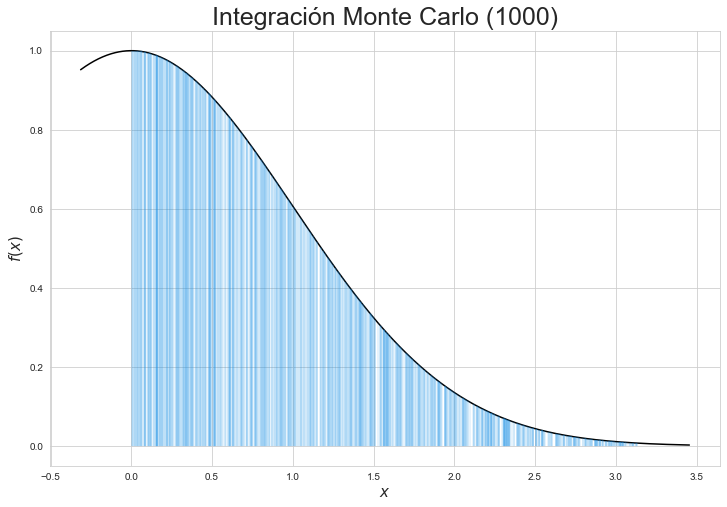

In [19]:
# Mostrar plot de la integral (.plot_integral())
miMonteCarlo.plot_integral()

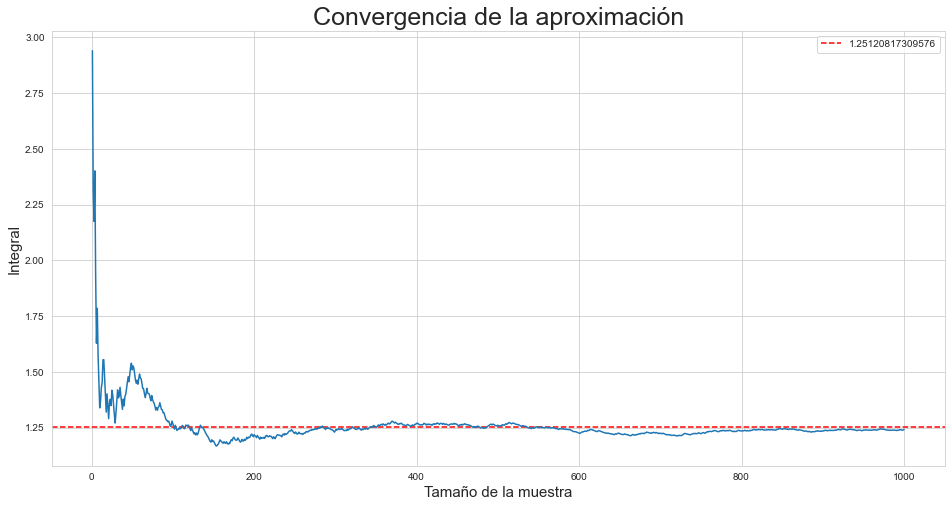

In [25]:
# Mostrar plot de convergencia (.plot_convergencia())
miMonteCarlo.compute(f, 0, np.pi, 1000)
miMonteCarlo.plot_convergencia(1.25120817309576)

In [26]:
# Mostrar df
miMonteCarlo.df

,x,f,convergencia
0,0.364433,0.935751,2.939749
1,1.117663,0.535483,2.311009
2,1.001782,0.605450,2.174699
3,0.199450,0.980306,2.400955
4,3.141532,0.007193,1.925283
...,...,...,...
995,2.288082,0.072973,1.240573
996,2.937309,0.013381,1.239370
997,2.275520,0.075095,1.238365
998,0.122998,0.992464,1.240246


In [27]:
# Mostrar informe
print(miMonteCarlo)

******************
     Informe     
******************
Tamaño de Muestra: 1000
Valor Obtenido: 1.242146341659343


## Ejercicios Morales
1. Aproxime el valor de la siguiente integral:
$$\int_{-2\pi}^{2\pi} \frac{\sin(x)}{x}\, dx$$
2. Aproxime el valor de la siguiente integral:
$$\int_{-1}^{1} \sqrt{1-x^4}\, dx$$
3. Aproxime el valor de $\Gamma\big(\frac{1}{2}\big)$, muestre un informe conociendo el valor real.
4. ¿Cómo ocuparía este método para aproximar el área de una circunferencia de radio $r>0$?, muestre un ejemplo.
5. ¿Cómo ocuparía este método para aproximar el valor de $\pi$ o $\sqrt{2}$?
6. ¿Cómo ocuparía este método para aproximar el valor de $n!$ cuando $n$ es grande?


Si te interesa saber más acerca del método de Monte Carlo, consulta el siguiente <a href= https://en.wikipedia.org/wiki/Monte_Carlo_method>link</a>.

Y... ¿qué sigue?
* Reducción de Varianza (ver Ross capítulo de simulación / <a href = https://en.wikipedia.org/wiki/Variance_reduction>resumen</a>)
* Rejection Sampling(<a href = https://en.wikipedia.org/wiki/Rejection_sampling> resumen </a>)
* Importance Sampling (<a href = https://en.wikipedia.org/wiki/Importance_sampling>resumen</a>)
* Markov Chain Monte Carlo [MCMC] (<a href = https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo>resumen</a>)
    - Gibbs Sampling (<a href = https://en.wikipedia.org/wiki/Gibbs_sampling>resumen</a>)
    - Metropolis-Hastings (<a href = https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm>resumen</a>)